In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(A, x, b):
  return np.linalg.norm(A @ x - b) ** 2

def gradf(A, x, b):
  return 2 * A.T @ (A @ x - b)

def LMO(A, x, b, R):
  s = np.zeros_like(x)
  g = gradf(A, x, b)
  g_ = np.absolute(g)
  ind = np.nonzero(g_ == g_.max())[0][0]
  # print(ind)
  s[ind] = -np.sign(g[ind]) * R
  return s 

def FrankWolfe(x0, A, b, lam, R, num_iter):
  x = x0
  L = np.real(np.linalg.eig(2 * A.T @ A)[0][0])
  # hist = [np.linalg.norm(A @ x - b) ** 2 + lam * np.linalg.norm(x, 1)]
  hist_res = [np.linalg.norm(A @ x - b) ** 2]
  hist_norm = [np.linalg.norm(x, 1)]
  for k in range(num_iter):
    s = LMO(A, x, b, R)
    gamma = 2 / (3 + k)
    # gamma = np.minimum(np.dot(x - s, gradf(A, x, b)) / L / (np.linalg.norm(x - s) ** 2), 1)
    # gamma = np.dot(A @ (s - x), b - A @ x) / (np.linalg.norm(A @ (s - x)) ** 2) 
    x = (1 - gamma) * x + gamma * s
    # hist.append(np.linalg.norm(A @ x - b) ** 2 + lam * np.linalg.norm(x, 1))
    hist_res.append(np.linalg.norm(A @ x - b) ** 2)
    hist_norm.append(np.linalg.norm(x, 1))
  return x, hist_res, hist_norm

In [37]:
# A = np.random.normal(size=(200,500))
# x_opt = np.zeros(500)
# x_opt[0:50] = 2 * np.random.binomial(1, 0.5, 50) - 1 + np.random.normal(scale=0.1, size=50)
# b = A @ x_opt + np.random.normal(scale=0.5, size=200)

# A = np.random.normal(size=(700,500))
# x_opt = np.zeros(500)
# x_opt[0:50] = 2 * np.random.binomial(1, 0.5, 50) - 1 + np.random.normal(scale=0.1, size=50)
# b = A @ x_opt

# A = np.random.normal(size=(1000,4000))
# x_opt = np.zeros(4000)
# x_opt[0:100] = 2 * np.random.binomial(1, 0.5, 100) - 1 + np.random.normal(scale=0.1, size=100)
# b = A @ x_opt

A = np.random.normal(size=(1000,1000))
x_opt = np.zeros(1000)
x_opt[0:100] = 2 * np.random.binomial(1, 0.5, 100) - 1 + np.random.normal(scale=0.1, size=100)
b = A @ x_opt

value_opt = (np.linalg.norm(A @ x_opt - b) ** 2) + np.linalg.norm(x_opt, 1)

x0 = np.zeros(1000)

In [38]:
x_out, hist_res, hist_norm = FrankWolfe(x0, A, b, 1, 100, 1000)

In [5]:
def soft_thresh(x, lam, L):
  return np.sign(x) * np.maximum(np.absolute(x) - lam / L, 0)

In [6]:
def acceleratedNesterov_first(x0, A, b, lam, R, num_iter):
  x = x0.copy()
  y = x0.copy()
  t = 1
  q = 0.7

  L = np.real(np.linalg.eig(2 * A.T @ A)[0][0])
  alpha = 1/L
  # print(L)

  # hist = [np.linalg.norm(A @ x - b) ** 2 + lam * np.linalg.norm(x, 1)]
  hist_res = [np.linalg.norm(A @ x - b) ** 2]
  hist_norm = [np.linalg.norm(x, 1)]

  for k in range(num_iter):
    x_ = y - alpha * gradf(A, y, b)
    D = (t ** 2 - q) ** 2 + 4 * (t ** 2)
    t_ = (q - (t ** 2) + np.sqrt(D)) / 2
    beta = t * (1 - t) / ((t ** 2) + t_)
    y = x_ + beta * (x_ - x) 

    t = t_
    x = x_

    # hist.append(np.linalg.norm(A @ x - b) ** 2 + lam * np.linalg.norm(x, 1))
    hist_res.append(np.linalg.norm(A @ x - b) ** 2)
    hist_norm.append(np.linalg.norm(x, 1))
  
  return x, hist_res, hist_norm

In [7]:
def acceleratedNesterov(x0, A, b, lam, R, num_iter):
  x = x0.copy()
  y = x0.copy()
  t = 1

  L = np.real(np.linalg.eig(2 * A.T @ A)[0][0])
  # print(L)

  # hist = [np.linalg.norm(A @ x - b) ** 2 + lam * np.linalg.norm(x, 1)]
  hist_res = [np.linalg.norm(A @ x - b) ** 2]
  hist_norm = [np.linalg.norm(x, 1)]

  for k in range(num_iter):
    x_ = soft_thresh(y - gradf(A, y, b) / L, lam, L)
    # print(x_)
    t_ = (1 + np.sqrt(1 + 4 * (t ** 2))) / 2
    # print(t_)
    y = x_ + (t - 1) * (x_ - x) / t_

    t = t_
    x = x_

    # hist.append(np.linalg.norm(A @ x - b) ** 2 + lam * np.linalg.norm(x, 1))
    hist_res.append(np.linalg.norm(A @ x - b) ** 2)
    hist_norm.append(np.linalg.norm(x, 1))
  
  return x, hist_res, hist_norm

In [39]:
x_out_, hist_res_, hist_norm_ = acceleratedNesterov(np.zeros_like(x_out), A, b, 1, 50, 1000)

In [40]:
x_out__, hist_res__, hist_norm__ = acceleratedNesterov_first(np.zeros_like(x_out), A, b, 1, 50, 1000)

In [105]:
print(value_opt)
print((np.linalg.norm(A @ x_out - b) ** 2) + np.linalg.norm(x_out, 1))

96.30041989957064
111.90444021111695


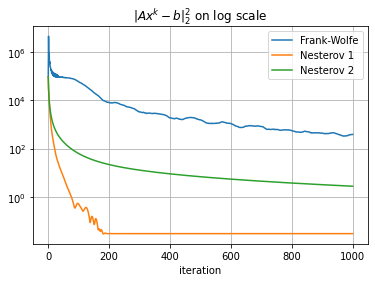

In [41]:
plt.plot(hist_res, label="Frank-Wolfe")
plt.plot(hist_res_, label="Nesterov 1")
plt.plot(hist_res__, label="Nesterov 2")
# plt.ylim(0, 500)
plt.yscale('log')
plt.title("$\|Ax^k-b\|^2_2$ on log scale")
plt.xlabel("iteration")
plt.grid()
plt.legend()
plt.savefig("exp4_res.png")
plt.show()

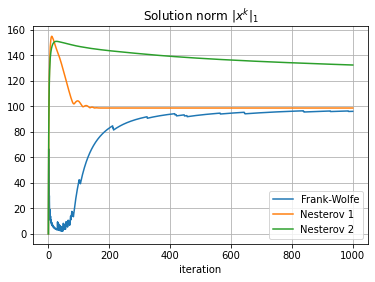

In [42]:
plt.plot(hist_norm, label = 'Frank-Wolfe')
plt.plot(hist_norm_, label = 'Nesterov 1')
plt.plot(hist_norm__, label = 'Nesterov 2')
# plt.ylim(0, 500)
# plt.yscale('log')
plt.title("Solution norm $\|x^k\|_1$")
plt.xlabel("iteration")
plt.grid()
plt.legend()
plt.savefig("exp4_norm.png")
plt.show()

In [87]:
print(np.linalg.norm(x_out - x_opt))
print(np.linalg.norm(x_out_ - x_opt))

3.0376157233446888
0.005962102825615369
